In [1]:
import torch
from pytorch_lightning import Trainer
from models.vanilla_vae import VanillaVAE  # Adjust the import path as necessary
import numpy as np

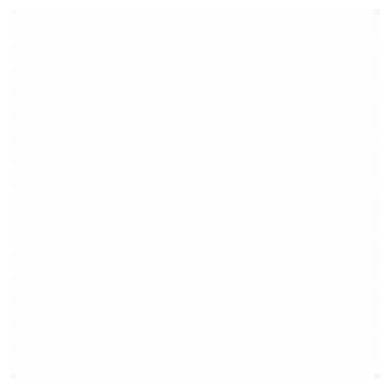

In [2]:


# Define the model parameters (these should match the parameters used during training)
in_channels = 3  # Example: 3 for RGB images
latent_dim = 128  # Example: latent dimension size

# Define the path to the checkpoint
checkpoint_path = 'logs/VanillaVAE/version_22/checkpoints/last.ckpt'  # Replace with the actual path to your checkpoint file
checkpoint = torch.load(checkpoint_path)
state_dict = checkpoint['state_dict']
new_state_dict = {}
for k, v in state_dict.items():
    if k.startswith('model.'):
        new_state_dict[k[6:]] = v  # Remove 'model.' prefix
    else:
        new_state_dict[k] = v
model = VanillaVAE(in_channels=in_channels, latent_dim=latent_dim)

# Load the model from the checkpoint
model.load_state_dict(new_state_dict)

# Set the model to evaluation mode
model.eval()

# Move the model to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

img = model.sample(num_samples=1,current_device=device)  # Call the sample method to generate new images

import matplotlib.pyplot as plt

# Convert the tensor to a numpy array and transpose the dimensions to (H, W, C)
img_np = img.cpu().detach().numpy().squeeze()
img_np = img_np.transpose(1, 2, 0)

# Clip the values to be in the range [0, 1]
img_np = np.clip(img_np, 0, 1)

# Display the image
plt.imshow(img_np)
plt.axis('off')  # Turn off axis
plt.show()

In [3]:
samples = model.sample(1, current_device=device)
print(samples)

tensor([[[[0.9933, 0.9987, 0.9978,  ..., 0.9992, 0.9978, 0.9828],
          [0.9981, 0.9998, 0.9998,  ..., 0.9999, 0.9997, 0.9956],
          [0.9994, 0.9998, 0.9999,  ..., 0.9999, 0.9998, 0.9958],
          ...,
          [0.9983, 0.9998, 0.9998,  ..., 1.0000, 0.9999, 0.9977],
          [0.9991, 0.9998, 0.9999,  ..., 1.0000, 0.9999, 0.9983],
          [0.9822, 0.9971, 0.9968,  ..., 0.9988, 0.9977, 0.9870]],

         [[0.9884, 0.9994, 0.9980,  ..., 0.9996, 0.9982, 0.9712],
          [0.9987, 0.9999, 0.9998,  ..., 1.0000, 0.9998, 0.9936],
          [0.9925, 0.9997, 0.9997,  ..., 0.9998, 0.9996, 0.9909],
          ...,
          [0.9991, 0.9999, 0.9999,  ..., 1.0000, 1.0000, 0.9966],
          [0.9942, 0.9998, 0.9997,  ..., 1.0000, 0.9999, 0.9969],
          [0.9830, 0.9979, 0.9984,  ..., 0.9992, 0.9987, 0.9679]],

         [[0.9911, 0.9989, 0.9982,  ..., 0.9992, 0.9981, 0.9649],
          [0.9984, 1.0000, 0.9997,  ..., 1.0000, 0.9997, 0.9971],
          [0.9982, 0.9998, 1.0000,  ..., 0